In [ ]:
!git clone https://github.com/billyhjm/PHM_Education.git
cd /content/PHM_Education

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import hilbert
import z_dependancy as z_dep
plt.rc('font', size=20)

## Envelop Analysis Modulated Signal

In [2]:
fs = 25600

data = np.array(pd.read_csv('./data/data_sample_envelope.csv'))
print(np.shape(data))
print(data)

t = data[:,1]
v = data[:,2]

(76800, 3)
[[ 0.00000000e+00  0.00000000e+00 -4.88526514e-05]
 [ 1.00000000e+00  3.90625000e-05  3.11578534e-19]
 [ 2.00000000e+00  7.81250000e-05  4.17858871e-05]
 ...
 [ 7.67970000e+04  2.99988281e+00  0.00000000e+00]
 [ 7.67980000e+04  2.99992188e+00  0.00000000e+00]
 [ 7.67990000e+04  2.99996094e+00  0.00000000e+00]]


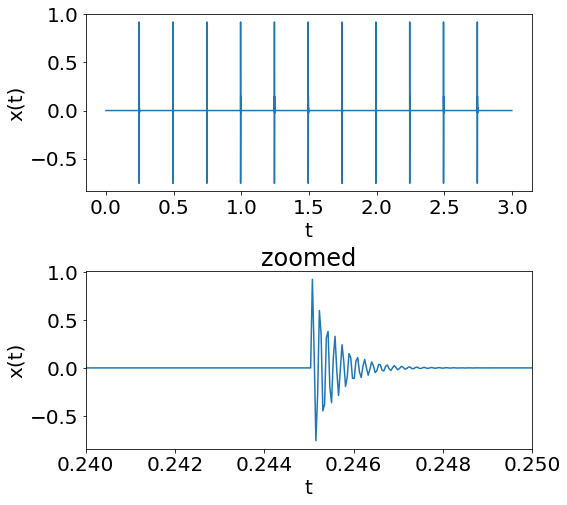

In [3]:
plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(t,v)
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplot(2,1,2)
plt.plot(t,v)
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('zoomed')
plt.xlim([0.24, 0.25])
plt.subplots_adjust(hspace=0.45)

## FFT of the modulated signal (using the function)

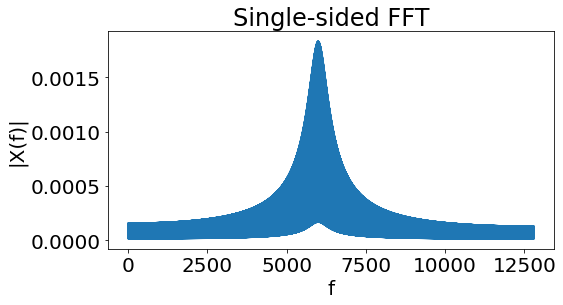

In [4]:
f,A=z_dep.z_fft_simple(v,fs)

plt.figure(figsize=(8,4))

# plt.stem(f,A)
plt.plot(f,A)
plt.xlabel('f')
plt.ylabel('|X(f)|')
plt.title('Single-sided FFT')
# plt.xlim([0,200]) 
# plt.ylim([0,2.1])

plt.subplots_adjust(hspace=0.35)

## Extract envelope using Hilbert transform

In [5]:
v_hilbert=hilbert(v,axis=0)
v_envelop = abs(v_hilbert)

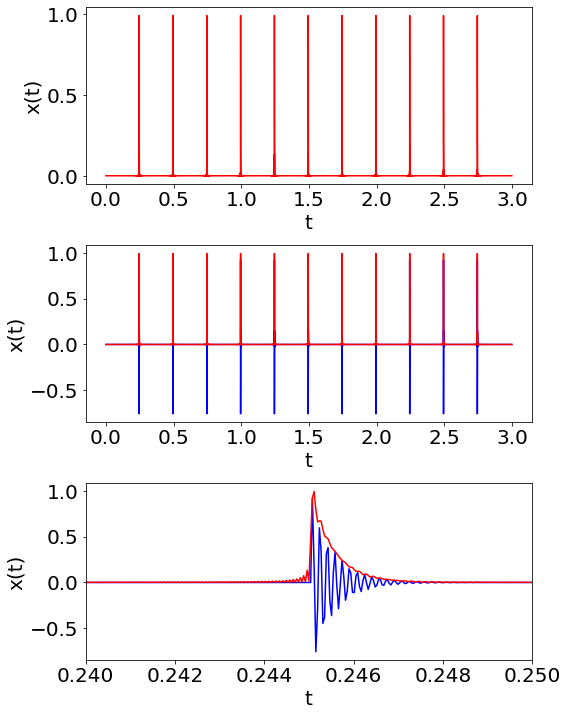

In [6]:
plt.figure(figsize=(8,12))

plt.subplot(3,1,1)
plt.plot(t,v_envelop,'r')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplot(3,1,2)
plt.plot(t,v,'b')
plt.plot(t,v_envelop,'r')
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplot(3,1,3)
plt.plot(t,v,'b')
plt.plot(t,v_envelop,'r')
plt.xlim([0.24, 0.25])
plt.xlabel('t')
plt.ylabel('x(t)')

plt.subplots_adjust(hspace=0.35)

## FFT of envelope

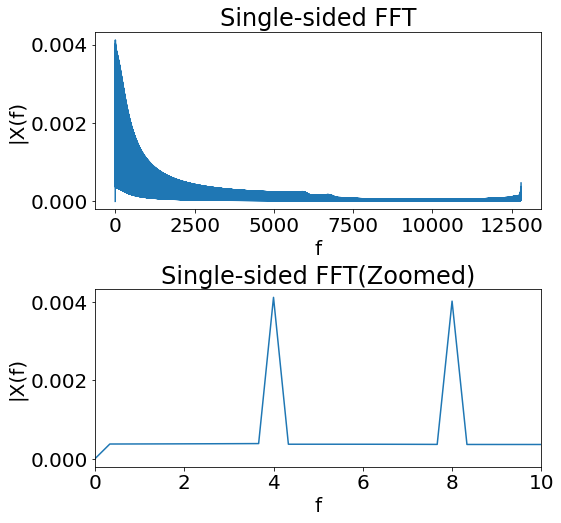

In [7]:
f,A=z_dep.z_fft_simple(v_envelop-np.mean(v_envelop),fs)

plt.figure(figsize=(8,8))

plt.subplot(2,1,1)
plt.plot(f,A)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Single-sided FFT')

plt.subplot(2,1,2)
plt.plot(f,A)
plt.xlabel('f')
plt.ylabel('|X(f)')
plt.title('Single-sided FFT(Zoomed)')
plt.xlim([0,10])

plt.subplots_adjust(hspace=0.45)